In [3]:
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import datasets as ds
import cv2  
#import cv
from PIL import Image

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
# Any results you write to the current directory are saved as output.
import sys

sys.path

sys.executable

'C:\\Anaconda\\python.exe'

In [4]:
#im = cv2.LoadImage("C:/Users/sulem/Desktop/MachineLearningNotebooks-master/Dataset")
infilename="C:/SMU/EMIS 7324 - Machine Learning in Python/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A"

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )

Working with 3000 images
Image examples: 
H1034.jpg


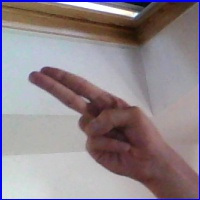

H1035.jpg


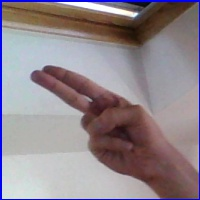

In [5]:
folder ="C:/SMU/EMIS 7324 - Machine Learning in Python/asl-alphabet/asl_alphabet_train/asl_alphabet_train/H"
#d = 1
#d=str(d)
#folder=folder+"/"+ d
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [6]:
from scipy import ndimage
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
num_of_img=250
n_components = 500
x_flat = np.zeros((num_of_img*29,40000))
x_g= np.zeros((200,200))
files=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','nothing','space']

i=0
for d in range(0,28):
 folder ="C:/SMU/EMIS 7324 - Machine Learning in Python/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"

 folder=folder+"/"+files[d]
 #onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
 onlyfiles = os.listdir(folder)

 train_files = []
 y_train = []

 f_n=0
 for _file in onlyfiles:
    train_files.append(_file)
    f_n += 1
    if f_n>num_of_img:
        break
#    label_in_file = _file.find("_")
#    y_train.append(int(_file[label_in_file+1:-4]))
    
 print("Files in train_files: %d" % len(train_files))
 
 # Original Dimensions
 image_width = 400
 image_height = 400
 ratio = 2

 image_width = int(image_width / ratio)
 image_height = int(image_height / ratio)

 channels =3
 nb_classes = 1

 dataset = np.ndarray(shape=(len(train_files),image_height, image_width,channels,),
                     dtype=np.int32)
 
 for _file in train_files:
    img = load_img(folder + "/"+ _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    #img = img.convert('LA')
    x = img_to_array(img) 
    for k in range(0, 199):
        x_g[k]=((x[k][:,0])*0.299)+((x[k][:,1])*0.587)+((x[k][:,2])*0.114 )

    x_flat[i]=x_g.ravel()
    # Normalize
    #x = (x - 128.0) / 128.0
   # dataset[i] = x
    i += 1
    if i % len(train_files) == 0:
        print("%d images to array" % i)
x_flat = x_flat.astype(int)
print("All images to array!")

Using TensorFlow backend.


Files in train_files: 251
251 images to array
Files in train_files: 251
502 images to array
Files in train_files: 251
753 images to array
Files in train_files: 251
1004 images to array
Files in train_files: 251
1255 images to array
Files in train_files: 251
1506 images to array
Files in train_files: 251
1757 images to array
Files in train_files: 251
2008 images to array
Files in train_files: 251
2259 images to array
Files in train_files: 251
2510 images to array
Files in train_files: 251
2761 images to array
Files in train_files: 251
3012 images to array
Files in train_files: 251
3263 images to array
Files in train_files: 251
3514 images to array
Files in train_files: 251
3765 images to array
Files in train_files: 251
4016 images to array
Files in train_files: 251
4267 images to array
Files in train_files: 251
4518 images to array
Files in train_files: 251
4769 images to array
Files in train_files: 251
5020 images to array
Files in train_files: 251
5271 images to array
Files in train_f

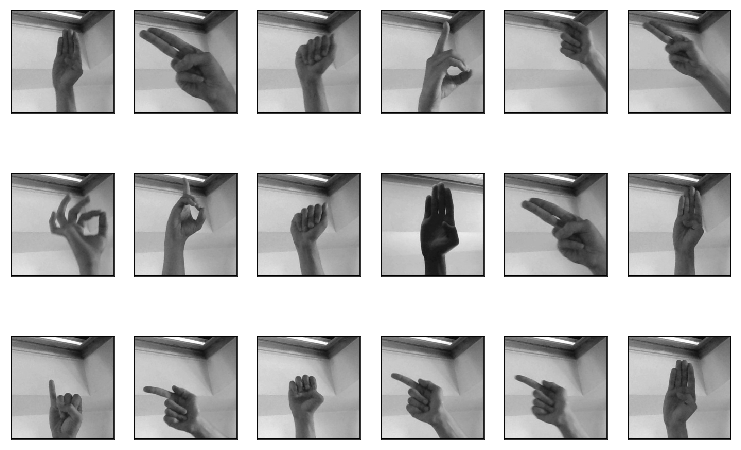

In [7]:
def plot_gallery(images,rnd, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[np.random.randint(rnd)].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_gallery(x_flat,2062, 200, 200) # defaults to showing a 3 by 6 subset of the faces

In [8]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(x_flat.copy())
eigenfingers = pca.components_.reshape((n_components, 200, 200))


Extracting the top 500 eigenfaces from 7250 faces
Wall time: 1min 10s


In [9]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [10]:
plot_explained_variance(pca)

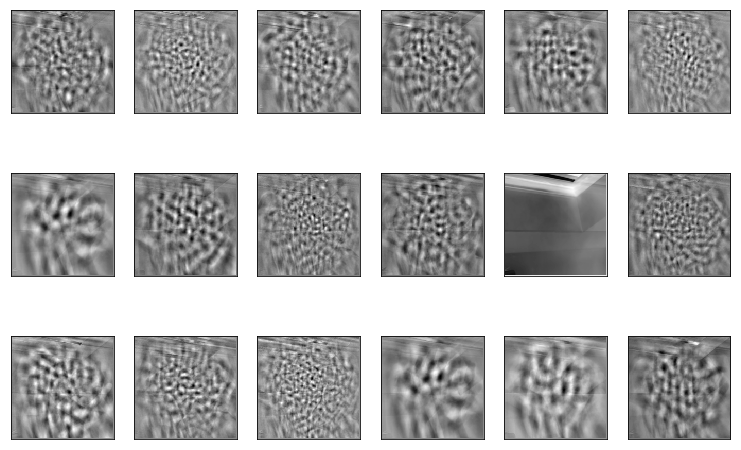

In [11]:
eigenfingers.shape
plot_gallery(eigenfingers,n_components, 200, 200)

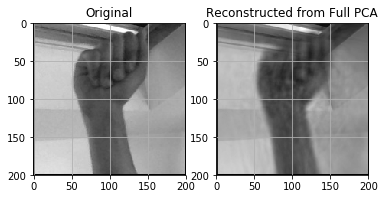

In [13]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = np.random.randint(1000)   
X_idx = x_flat[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))


plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((200, 200)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((200, 200)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

In [12]:
from sklearn.decomposition import PCA


print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, x_flat.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(x_flat.copy())
eigenfingers = rpca.components_.reshape((n_components, 200, 200))

Extracting the top 500 eigenfaces from 7250 faces
Wall time: 1min 12s


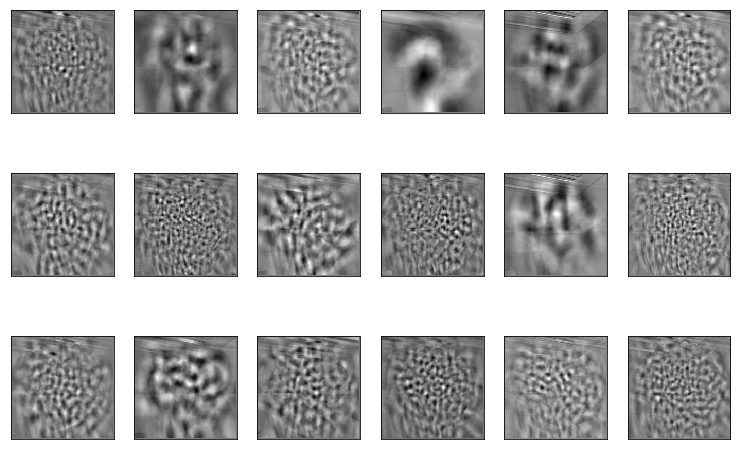

In [13]:
plot_gallery(eigenfingers, 500, 200,200)

In [14]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 500
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components,x_flat.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(x_flat)

Extracting the top 500 eigenfaces from 7250 faces, ALSO getting inverse transform
Wall time: 2min 53s


In [8]:
import warnings
import ipywidgets as widgets
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)

h=200
w=200

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(x_flat[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,(num_of_img*29)-1,1),__manual=True)

interactive(children=(IntSlider(value=3624, description='idx_to_reconstruct', max=7249), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

# Feature Extraction with DAISY

In [9]:
from skimage.feature import daisy
from skimage.io import imshow

#idx_to_reconstruct = int(np.random.rand(1)*len(x_flat))
idx_to_reconstruct = 660

img  = x_flat[idx_to_reconstruct].reshape((h,w))

#imshow(img)
#plt.grid()
#plt.imshow(img, cmap=plt.cm.gray)
#plt.imshow(x_flat[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)

# lets first visualize what the daisy descripto looks like
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

#imshow(img_desc, cmap=plt.cm.gray) # TODO: Fix image.. Not sure why this won't work
#plt.grid()

(18, 18, 72)
23328


In [10]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(x_flat[3],(h,w))
test_feature.shape

Wall time: 52.9 ms


(33696,)

In [11]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, x_flat, (h,w))
print(daisy_features.shape)


Wall time: 15min 5s
(7250, 33696)


In [12]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

Wall time: 15.6 s


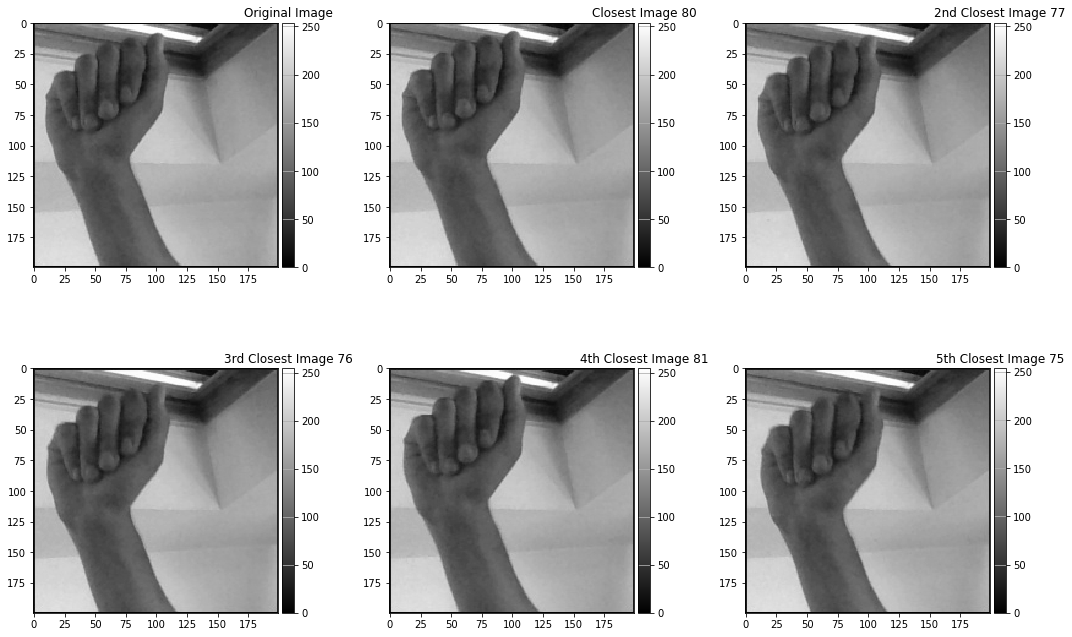

In [19]:
import copy
warnings.filterwarnings('ignore')

h,w = 200, 200

# find closest image to current image
idx1 = int(np.random.rand(1)*len(x_flat))

distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

distances[idx2] = np.infty # gathering more like images
idx3 = np.argmin(distances)

distances[idx3] = np.infty # gathering more like images
idx4 = np.argmin(distances)

distances[idx4] = np.infty # gathering more like images
idx5 = np.argmin(distances)

distances[idx5] = np.infty # gathering more like images
idx6 = np.argmin(distances)



plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
imshow(x_flat[idx1].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Original Image", loc='center')
plt.grid()

plt.subplot(3,3,2)
imshow(x_flat[idx2].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Closest Image " + str(idx2))
plt.grid()

plt.subplot(3,3,3)
imshow(x_flat[idx3].reshape((h,w)), cmap=plt.cm.gray)
plt.title("2nd Closest Image " + str(idx3))
plt.grid()

plt.subplot(3,3,4)
imshow(x_flat[idx4].reshape((h,w)), cmap=plt.cm.gray)
plt.title("3rd Closest Image " + str(idx4))
plt.grid()

plt.subplot(3,3,5)
imshow(x_flat[idx5].reshape((h,w)), cmap=plt.cm.gray)
plt.title("4th Closest Image " + str(idx5))
plt.grid()

plt.subplot(3,3,6)
imshow(x_flat[idx6].reshape((h,w)), cmap=plt.cm.gray)
plt.title("5th Closest Image " + str(idx6))
plt.grid()


In [18]:
from ipywidgets import fixed
warnings.filterwarnings('ignore')

# put it together inside a nice widget
n_samples = 7028
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    imshow(x_flat[idx1].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Original Image " + str(idx1))
    plt.grid()

    plt.subplot(1,3,2)
    imshow(x_flat[idx2].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Closest Image  " + str(idx2))
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(x_flat[idx3].reshape((h,w)), cmap=plt.cm.gray)
    plt.title("Next Closest Image " + str(idx3))
    plt.grid()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)

interactive(children=(IntSlider(value=3513, description='idx1', max=7027), Output()), _dom_classes=('widget-in…

<function __main__.closest_image(dmat, idx1)>

# Pairwise Distances Visualization from DAISY Features

In [132]:
from string import ascii_uppercase
from pandas.plotting import scatter_matrix
import seaborn as sns


def nearest_swarm(dmat,idx1):
    cnt = 0
    letters = []
    for l in ascii_uppercase:
        for i in range(0, num_of_img):
            letters.append(l)
            cnt = cnt + 1

    for i in range(0, num_of_img):
            letters.append('del')
            cnt = cnt + 1  
    for i in range(0, num_of_img):
            letters.append('nothing')
            cnt = cnt + 1  
    for i in range(0, num_of_img):
            letters.append('space')
            cnt = cnt + 1  

    print('Chosen Letter: ', letters[idx1])
    dCopy = copy.deepcopy(dist_matrix[idx1,:])

    fig, ax = plt.subplots(figsize=(18,10))
    plt.xlabel('Label', fontsize=16)
    plt.ylabel('Pairwise Distance', fontsize=16)
    
    %time ax = sns.swarmplot(y=dCopy, x=letters)

widgets.interact(nearest_swarm,idx1=(0,n_samples-1,1),dmat=fixed(dist_matrix),__manual=True)



interactive(children=(IntSlider(value=3513, description='idx1', max=7027), Output()), _dom_classes=('widget-in…

<function __main__.nearest_swarm(dmat, idx1)>

From the pairwise distance visualization, you can see that utilizing DAISY feature extraction enables accurate classification of a handful of images that are quite similar to the original. However, past these first several, it quickly becomes less accurate and would not work well for detecting images other than these handful of closest matches. 

The problem is DAISY is trying to match the features at each point to the features at another identical coordinate. In our dataset, the difference between neighboring images changes slowly, so there are a few images that work very well with this classification. However, when the hand is in an entirely different location in the image, it can cause problems. It can also cause issues if the hand is rotated slightly between images. This could be improved if we did a brute force method where we compared the features at key points to every point in another image. 